In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import seaborn as sns


In [127]:

file_path = '../data/solarpowergeneration.csv' 
df = pd.read_csv(file_path)

In [114]:

target = 'power-generated'
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]


In [115]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [116]:

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=100)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [117]:

y_pred = model.predict(X_test)

In [118]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [119]:
print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")

Random Forest MAE: 1435.33
Random Forest RMSE: 3335.30


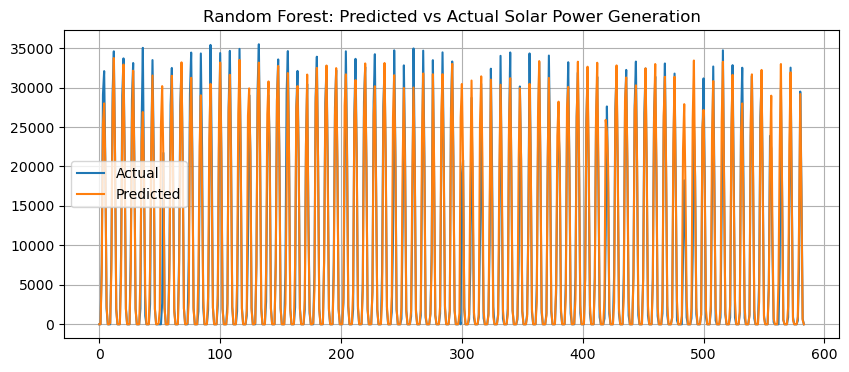

In [120]:

plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Random Forest: Predicted vs Actual Solar Power Generation")
plt.grid(True)
plt.show()

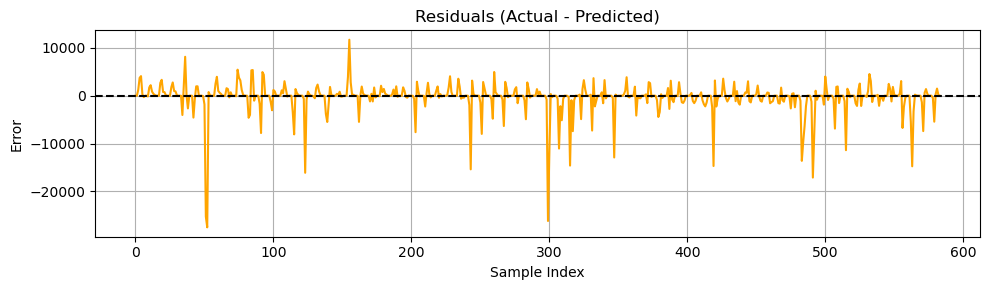

In [121]:
# 🔧 Residuals
residuals = y_test.values - y_pred

# 📉 1. Residuals Plot
plt.figure(figsize=(10, 3))
plt.plot(residuals, color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Sample Index")
plt.ylabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()

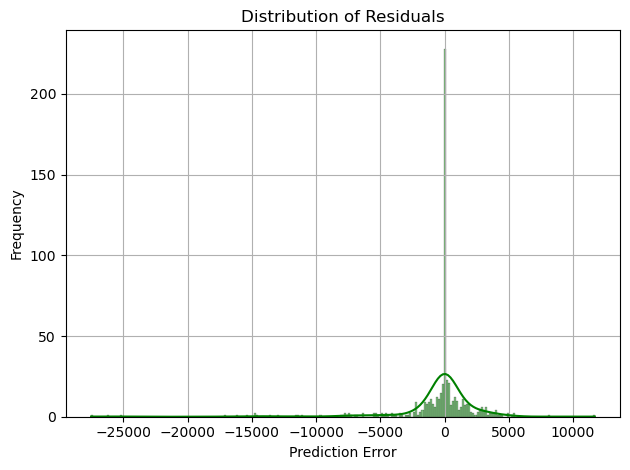

In [122]:
# 📊 2. Residuals Distribution

sns.histplot(residuals, kde=True, color='green')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

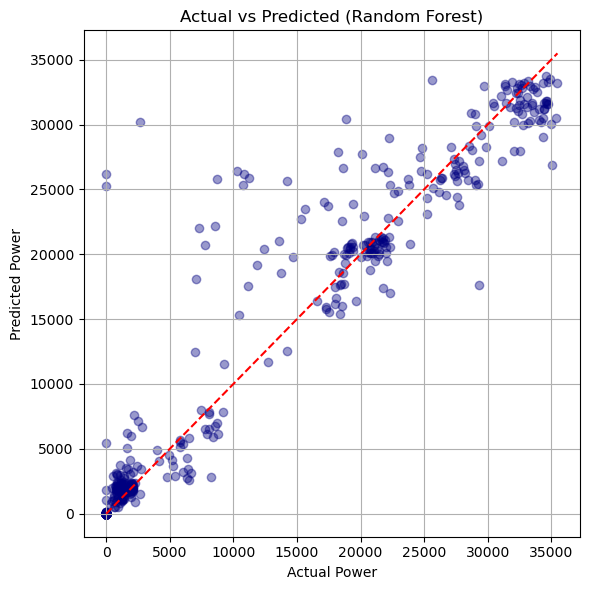

In [123]:
# 🎯 3. Actual vs Predicted Scatter Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted (Random Forest)")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.tight_layout()
plt.show()

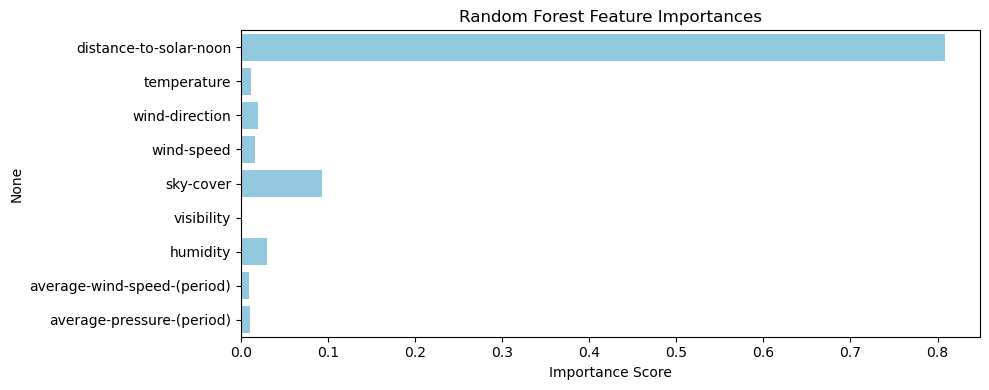

In [124]:
# 🌟 4. Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 4))
sns.barplot(x=importances, y=feature_names, color='skyblue')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [125]:


r2 = r2_score(y_test, y_pred)

print("🔍 Model Performance Summary")
print(f"📈 MAE  (Mean Absolute Error): {mae:.2f}")
print(f"📉 RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"🎯 R² Score: {r2:.4f}")
print(f"✅ Accuracy-like Score: {r2 * 100:.2f}%")

🔍 Model Performance Summary
📈 MAE  (Mean Absolute Error): 1435.33
📉 RMSE (Root Mean Squared Error): 3335.30
🎯 R² Score: 0.9249
✅ Accuracy-like Score: 92.49%
